In [2]:
import pandas as pd
import numpy as np
import os
from google.cloud import bigquery
from google.oauth2 import service_account
import pandas_gbq

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [3]:
service_path = ""
service_file = 'umt-msba-gg-key.json'   

gbq_proj_id = 'umt-msba'  

# And this should stay the same. 
private_key = service_path + service_file

# Now we pass in our credentials so that Python has permission to access our project.
credentials = service_account.Credentials.from_service_account_file(private_key)

# And finally we establish our connection
client = bigquery.Client(credentials = credentials, project=gbq_proj_id)
for item in client.list_datasets() : 
    print(item.full_dataset_id)

umt-msba:dram_shop
umt-msba:transactions
umt-msba:wedge_example
umt-msba:wedge_transactions


In [4]:
#SQL Query

query = """
SELECT *
FROM `umt-msba.dram_shop.vw_customer_top_1k_items`
  """

In [5]:
#assign data to a dataframe
dram_data = pandas_gbq.read_gbq(query, project_id=gbq_proj_id, credentials = credentials)

Downloading: 100%|██████████|


In [6]:
#remove the object id column
dram_data = dram_data.drop(columns=['catalog_object_id'])

In [7]:
dram_data.head()

,customer_identifier,item_name,meta_category,clean_item_name,clean_category_name,item_count,total_item_spend
0,K5SJ9HVPBX427280C8EFXMAAJG,Z Wandering Aengus Bloom,Cider,Bloom,Cider - Bottled,1,10.00
1,DB42DVBM43JT9W9ZZ33R411DK0,Z29M Huckleberry Seltzer - San Juan,Seltzer,Huckleberry Seltzer,Seltzer,1,5.50
2,ZBG690HXKK3S5CT5K4M89W0QER,Domaine de La Petite Soeur 'Kumu' Red Blend - ...,Wine,Red Blend,Red Wine - Bottled,1,31.00
3,91Q6ENSC0S2W7F6ANPDGVM3XY0,Quirk Hard Seltzer - 12oz can,Seltzer,Quirk Hard Seltzer,Hard Seltzer - Cans,1,4.00
4,1AREADABVX41K9F3P9YYCRYEPM,Okocim O.K Lager,Beer,O.K Lager,Lagers/Pils/Wheat - Bottled,1,4.75


In [8]:
pivoted_data = dram_data.pivot_table(index='customer_identifier', columns= 'clean_item_name', values= 'total_item_spend', aggfunc='sum')

In [9]:
pivoted_data.replace(np.nan, 0, inplace=True)

In [10]:
pivoted_data

clean_item_name,1664,2x4 Double IPA,3 Weight IPA,41 Peaks IPA,4Seasons Imp IPA,50 Shades of Green Fresh hop,60 Minute IPA,7B Hazy IPA,8 Hop Pale,805 Blonde,...,Yamabiko Rice Lager,Yard Sale Amber,Yuzu Onna,Zero Day Double IPA,Zweigelt,Zymopunk Pilsner,reserva cab sauv,|Z Populis Sauvignon Blanc - 2022| Sauvignon Blanc | Populis | 2022 |,¡SANTO DIOS! Mole Stout,¡Viva La Pineapple!
customer_identifier,,,,,,,,,,,,,,,,,,,,,
-A2AKZhjuY9mGYva,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-CZ-Iu95nyYrA5Y9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-QkUaC1aG0akFQGo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-aR2zGOC43DEJxWy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-cgoxa-kvRjroOge,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zg-UAZJzlVa05lFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zkBhdB_2COjw878l,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zl9vG1H_SzekSr61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#PCA Analysis

pca = PCA(n_components=20)
pca.fit(pivoted_data)

PCA(n_components=20)

In [12]:

explained_variance = pca.explained_variance_ratio_

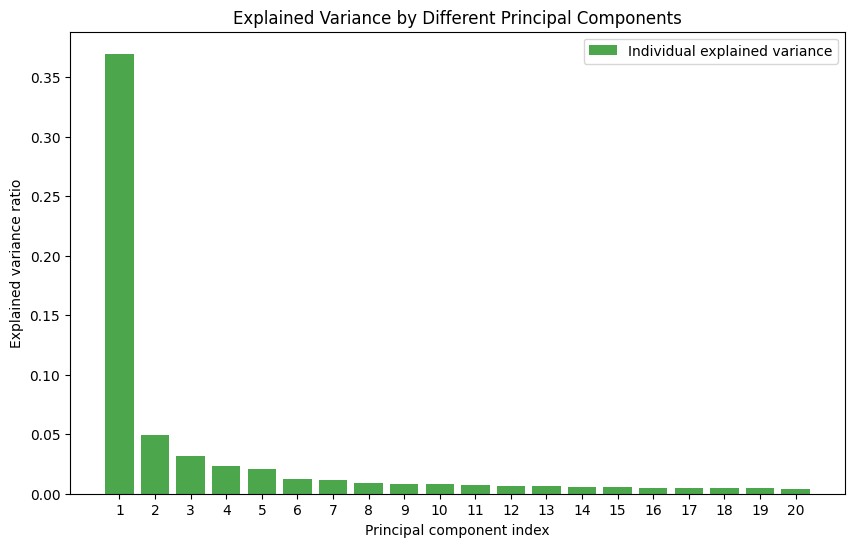

In [13]:

# Plotting the Explained Variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, 21), explained_variance, alpha=0.7, color='g', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.xticks(range(1, 21))
plt.title('Explained Variance by Different Principal Components')
plt.show()

In [14]:
#Create a new PCA for the first six components

pca_6 = PCA(n_components=6)
pca_6.fit(pivoted_data)

PCA(n_components=6)

In [18]:

components = pca_6.components_
feature_names = pivoted_data.columns
component_names = [f"Component {i+1}" for i in range(components.shape[0])]

for i, component in enumerate(components):
    # Get the indices of the 15 largest loadings in absolute value
    largest_indices = np.argsort(np.abs(component))[-15:]

    # Sort these indices by the actual value of the loading, from largest to smallest
    sorted_indices = sorted(largest_indices, key=lambda x: component[x], reverse=True)

    # Print the component name and the items with the 15 largest loadings
    print(f"{component_names[i]}:")
    for index in sorted_indices:
        item_name = feature_names[index]  # Get the feature name using the index
        print(f"  {item_name} Loading: {component[index]}")
    print("\n")

Component 1:
  Blackfoot Single Malt IPA Loading: 0.9941617756902849
  Super Pils Loading: 0.03896270148124023
  Grazing Clouds Hazy IPA Loading: 0.034359413283772386
  Celebration Loading: 0.028571236162795968
  Pilsner Loading: 0.0262991360769684
  IPA Loading: 0.02388991567881111
  Luponic Distortion IPA Loading: 0.02189703409807092
  Robot Panda Hazy IPA Loading: 0.021849129471864934
  Bodhizafa IPA Loading: 0.020185856015777374
  Head Full of Dynamite Loading: 0.017092206431032413
  Helles Lager Loading: 0.015913137904754696
  Mind Haze Loading: 0.013732802284242946
  Space Dust Loading: 0.011840623808702589
  Pinot Noir Loading: 0.011387312834633423
  All Day IPA Loading: 0.011237715663402337


Component 2:
  Super Pils Loading: 0.8076298458554033
  Pilsner Loading: 0.3622068197951036
  Helles Lager Loading: 0.19975675863009543
  Carlsberg Lager Loading: 0.12666718410497504
  Hell Helles Loading: 0.10650245474286525
  IPA Loading: 0.10153449291044432
  Kolsch Loading: 0.079359660

Component 1 is directly related to spend and whether or not a customer drinks Blackfoot IPA.

Component 2 relates to whether or not a customer likes lighter beers or not, the heaviest loadings are pilsners and lagers.

Component 3 offers insight on whether a patron is an IPA drinker or not, all the heaviest loadings are fairly high abv (if I remember correctly) IPA's.

Component 4 shows a large difference between cider lovers and IPA drinkers. Cider drinks have high loadings, while IPA's have negative loadings.

Component 5 compares red wine drinkers to cider drinkers, with red wine options having the highest loadings and ciders having the lowest.

Component 6 is less clear than the others. The only thing I can see different about the positively loaded and negatively loaded items is the word 'hazy' in the name. This might compare customers who prefer IPA's with or without 'hazy' in the name.